# Analyzing simulation results obtained with oommf for 2.5 um long Co magnet
calculate the fields from the magnetization, before magnetizing and after

In [67]:
import glob
import pandas as pd
import numpy as np
import datetime
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import patches

import os, sys
folder = './'
# sys.path.append('C:\Users\Experiment\Programs\oommf\Pyoommf\Pyoommf')
%matplotlib inline

# from Pyoommf import read_write as rw
# from Pyoommf import fields
                
import read_write as rw
import fields

data_folder = 'C:\\Users\\Experiment\\Programs\\oommf\\simulations\\simulation_with_vacuum_length_2.5um'
data_folder = 'simulation_with_vacuum_length_2.5um'

mu0 = 4 * np.pi *1e-7 # T m /A
target_folder = 'b_fields_xy-plane'

## define functions

In [114]:
def Bfield_from_mag(stage, data_folder, target_folder, tag = '2.5um_Co_magnet', xmax = 2.5e-6, xmin = None, ymax = 1.5e-6, ymin = None, zo = 0.1e-6, dx = 50e-9):
    """
    calculates the b field in the x-y plane as at a distance zo and saves it as a .csv to the data_folder/target_folder
    """
    
    f= glob.glob(os.path.join(os.path.join(data_folder, 'data'), '*Magnetization-{:05d}-*omf.tsv'.format(stage)))[0]
    data_mag, info_mag = rw.load_ommf_vect_data(f)
    
    
    if xmin is None:
        xmin = -xmax
    if ymin is None:
        ymin = -ymax
    
    
    # calculate the grid 
    x = np.arange(xmin, xmax, dx)
    y = np.arange(ymin, ymax, dx)
    Nx, Ny = len(x), len(y)
    X, Y = np.meshgrid(x, y)
    np.shape(X), np.shape(Y)

    r = np.array([X.flatten(), Y.flatten(), zo*np.ones(len(X.flatten()))]).T
    
    t1 =datetime.datetime.now()
    dataB = fields.calcBfield(r, data_mag, info_mag, True)
    t2 =datetime.datetime.now()
    print('duration:', str(t2-t1))
    
    
    out_file = os.path.join(os.path.join(data_folder, target_folder), '{:s}_b_fields_zo_{:0.1f}um_stage_{:03d}.csv'.format(tag, 1e6*zo, stage))

    dataB.to_csv(out_file, index=False)
    
    
    
def plot_Bfield(stage, data_folder, target_folder, tag = '2.5um_Co_magnet'):

    
    in_file = os.path.join(os.path.join(data_folder, target_folder), '{:s}_b_fields_zo_{:0.1f}um_stage_{:03d}.csv'.format(tag, 1e6*zo, stage))
    
    dataB = pd.read_csv(in_file)
    
    Nx, Ny = len(np.unique(dataB['x'])), len(np.unique(dataB['y']))
    
    
    
    C = np.sqrt(dataB['Bx']**2+dataB['By']**2+dataB['Bz']**2)
    C = C.reshape(Ny, Nx)
    
    X = dataB['x'].reshape(Ny, Nx)
    Y = dataB['y'].reshape(Ny, Nx)
    
    xmin, xmax = np.min(X), np.max(X)
    ymin, ymax = np.min(Y), np.max(Y)


    fig = plt.figure(figsize=(15,4))
    CS = plt.pcolor(X, Y, C*1e4)
    plt.colorbar(label= 'B (G)')
    plt.title('magnetic field - zo  = {:0.1f} um (stage {:03d})'.format(1e6*zo, stage))
    plt.xlabel('x ($\mu m$)')
    plt.ylabel('y ($\mu m$)')

    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])

    plt.axes().set_aspect('equal')

    
    
    fig.savefig(out_file.replace('.csv', '.jpg'))

### load the data

In [3]:
tabdata = rw.load_ommf_tab_data(glob.glob(os.path.join(data_folder, 'random_K1_length_2.5um*.odt'))[0])
tabdata.head()

,Max mxHxm,Total energy,Delta E,Bracket count,Line min count,Conjugate cycle count,Cycle count,Cycle sub count,Energy calc count,Energy,...,B,Bx,By,Bz,Energy,Iteration,Stage iteration,mx,my,mz
Stage,,,,,,,,,,,,,,,,,,,,,
0.0,0.088257,3.409945e-14,0.000000e+00,2956.0,817.0,1541.0,2415.0,124.0,3774.0,4.073855e-15,...,0.0,0.0,0.0,0.0,1.317887e-15,3530.0,3530.0,-0.079731,0.006641,0.000044
1.0,0.095594,3.295752e-14,0.000000e+00,5505.0,2177.0,2253.0,4541.0,707.0,7685.0,3.839340e-15,...,20.0,20.0,0.0,0.0,1.665755e-15,7222.0,3691.0,0.493954,-0.000201,0.000196
2.0,0.096855,2.962634e-14,0.000000e+00,7280.0,2807.0,3011.0,5993.0,104.0,10092.0,2.668977e-15,...,40.0,40.0,0.0,0.0,2.573601e-15,9468.0,2245.0,0.880389,-0.001033,0.001331
3.0,0.098143,2.722594e-14,0.000000e+00,7519.0,2976.0,3037.0,6197.0,92.0,10502.0,2.559349e-15,...,60.0,60.0,0.0,0.0,2.695890e-15,9845.0,376.0,0.900056,0.000653,0.001321
4.0,0.088903,2.471934e-14,-3.155444e-30,7912.0,3196.0,3122.0,6511.0,92.0,11117.0,2.433089e-15,...,80.0,80.0,0.0,0.0,2.956785e-15,10401.0,555.0,0.927521,-0.000634,0.001034


### find out which stages are at zero external field

In [4]:
tabdata[tabdata.B ==0]

,Max mxHxm,Total energy,Delta E,Bracket count,Line min count,Conjugate cycle count,Cycle count,Cycle sub count,Energy calc count,Energy,...,B,Bx,By,Bz,Energy,Iteration,Stage iteration,mx,my,mz
Stage,,,,,,,,,,,,,,,,,,,,,
0.0,0.088257,3.409945e-14,0.000000e+00,2956.0,817.0,1541.0,2415.0,124.0,3774.0,4.073855e-15,...,0.0,0.0,0.0,0.0,1.317887e-15,3530.0,3530.0,-0.079731,0.006641,0.000044
50.0,0.090519,3.440724e-14,-1.262177e-29,21312.0,12967.0,3389.0,19351.0,415.0,34380.0,3.148964e-15,...,0.0,0.0,0.0,0.0,2.521110e-15,33099.0,831.0,0.852031,0.002109,0.001182
100.0,0.097951,3.425637e-14,0.000000e+00,44034.0,27226.0,6061.0,39713.0,1808.0,71461.0,3.164625e-15,...,0.0,0.0,0.0,0.0,2.374575e-15,68269.0,4021.0,-0.820610,-0.003481,-0.001579


In [81]:
info_mag

{'field_type': 'Magnetization',
 'xmax': 1.3e-06,
 'xmin': -1.3e-06,
 'xnodes': 260.0,
 'xstepsize': 1e-08,
 'ymax': 2e-07,
 'ymin': -2e-07,
 'ynodes': 40.0,
 'ystepsize': 1e-08,
 'zmax': 2e-07,
 'zmin': -1e-07,
 'znodes': 30.0,
 'zstepsize': 1e-08}

### calculate the field

In [101]:
for stage in [0, 50, 100]:
    Bfield_from_mag(stage, data_folder, target_folder)

('length of data', 312000)
('number of magnetic moments', 75000)
('number of positions', 6161)
('using ', 8, ' cores')
('duration:', '0:01:23.663000')
('length of data', 312000)
('number of magnetic moments', 75000)
('number of positions', 6161)
('using ', 8, ' cores')
('duration:', '0:01:22.760000')
('length of data', 312000)
('number of magnetic moments', 75000)
('number of positions', 6161)
('using ', 8, ' cores')
('duration:', '0:01:24.293000')


### create plots

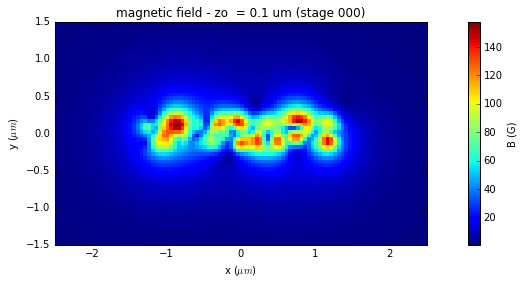

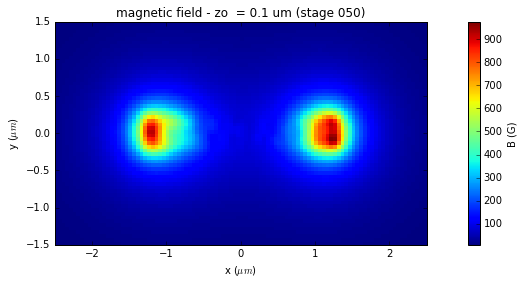

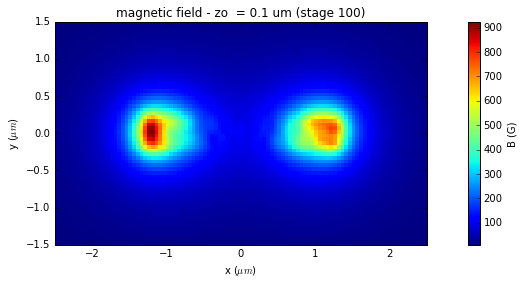

In [116]:
for stage in [0, 50, 100]:
    plot_Bfield(stage, data_folder, target_folder, tag = '2.5um_Co_magnet')